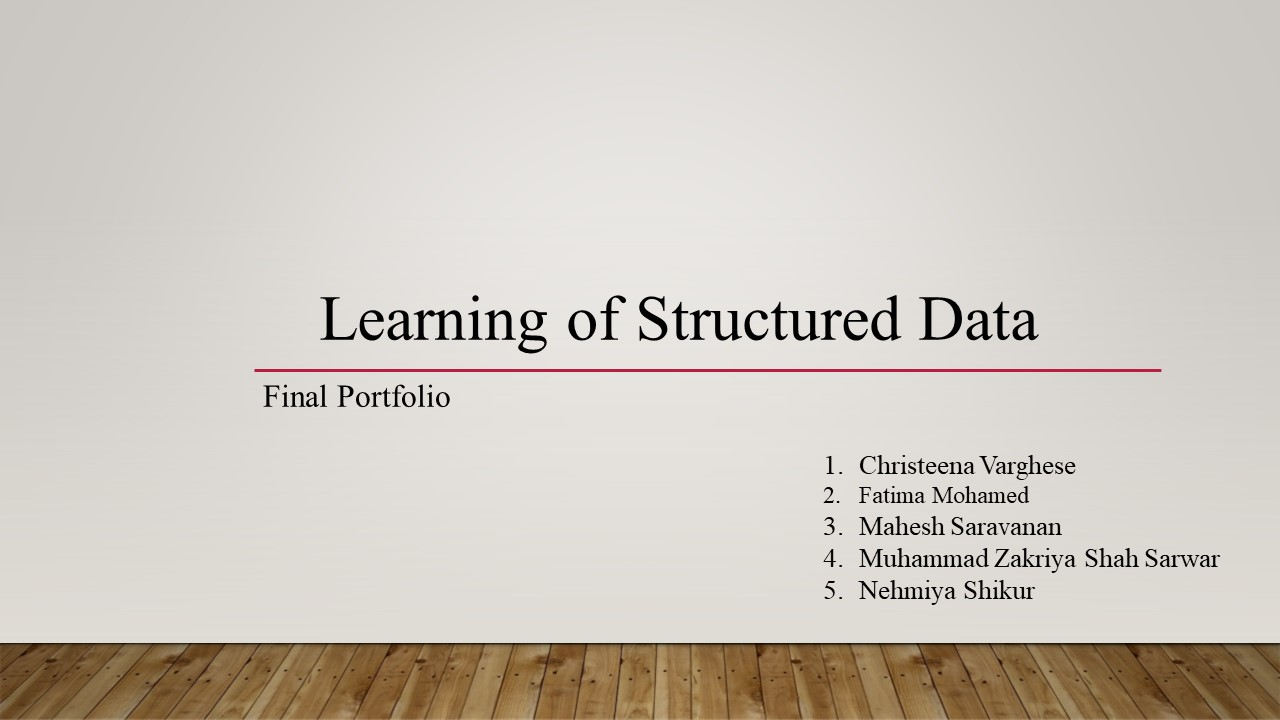

In [29]:
import importlib
import numpy as np
import dataload
import visualization as vs
import pca_lsd_
import CNN_1D
import CNN_2D
import tensorflow as tf ;import torch
from RNN_ import RNN 
import rf
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
from DTW import DynamicTimeWraping
import compare_models
import matplotlib.pyplot as plt
import tdataload

# Path to the training and test files
folder = 'train/'
test_folder = 'test/'

In [20]:
epochs = 5

### Load the Training files... 

In [2]:
hp = 30

ratio = 0.2
shuffle = False
x_train,x_test,y_train,y_test,dtwfiles,dtwlabels,header,classes = dataload.load(hp,folder,ratio,shuffle)

Fetching Train Data from the memory
 [ ====================================================================================================> ] 100 %
 Data loaded...


### Let's see how the data are distributed in all classes 

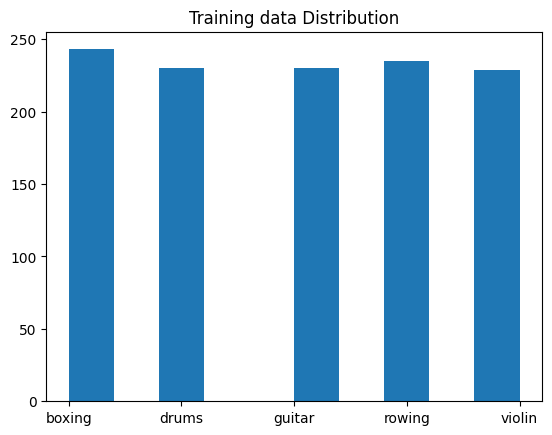

In [3]:
plt.hist(dtwlabels,bins = 10)
plt.title('Training data Distribution')
plt.xticks(range(5),classes)
plt.show()

## Let's Visualize the data 

In [32]:
for i in range(5):
    vs.visualize(dtwfiles[i],dtwlabels[i],classes)

### Principal Component Analysis

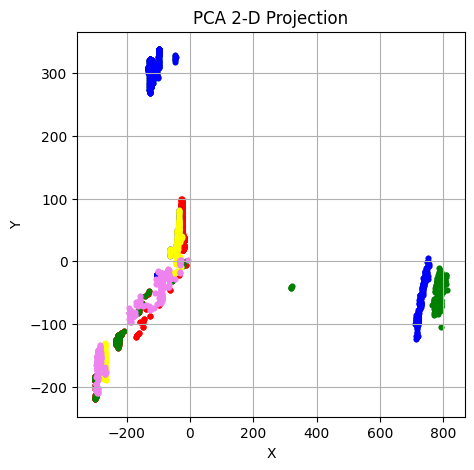

In [5]:
pca_lsd_.plot_pca()

## Methods we used...

##### 1. Convolutional Neural Network 1 Dimensional
##### 2. Convolutional Neural Network 2 Dimensional
##### 3. Long Short term Memory
##### 4. Random Forest
##### <font color='red'> 5.  Dynamic Time Wraping

### Models 
#### Neural Network

### 1. Convlutional Neural Network 1D 

In [6]:
model_cnn1d = CNN_1D.CNN()
#model_cnn1d = CNN_1D.fit(model_cnn1d,x_train,y_train,epochs,30,False,64,0.000001)
model_cnn1d = torch.load('trained_models/CNN_1D72.pth')
cnn_1d_acc,cnn_1d_cm = CNN_1D.evaluate(model_cnn1d,x_test,y_test,30,False)

### 2. Convlutional Neural Network 2D 

In [25]:
model_cnn2d = CNN_2D.CNN() 
#model_cnn2d = CNN_2D.fit(model_cnn2d,x_train,y_train,epochs,30,False)
model_cnn2d = torch.load('trained_models/trained_cnn2d.pth')
cnn_2d_acc,cnn_2d_cm = CNN_2D.evaluate(model_cnn2d,x_test,y_test,30,False)

### 3. Long Short Term Memory (LSTM) 

In [24]:
rnn = RNN()
rnn.build_model()
#rnn.fit(x_train,y_train,ep = epochs)
rnn.model = tf.keras.models.load_model('trained_models/lstm_trained_29_12.h5')
rnn_acc, rnn_cm = rnn.evaluate(x_test,y_test)

#### Other Machine Learning models

### 4. Random Forest 

In [10]:
def flat(data):return data.reshape(len(data),(x_train.shape[1]*x_train.shape[2]))
#data pre-processing
x_train_rf = flat(x_train)
y_train_rf = to_categorical(y_train) #one hot encoding
model_rf = RandomForestClassifier(n_estimators = 5)
model_rf.fit(x_train_rf,y_train_rf)
rf_acc,rf_cm = rf.evaluate(x_test,y_test,model_rf)

### <font color='red'> 5. Dynamic Time Wrapping 

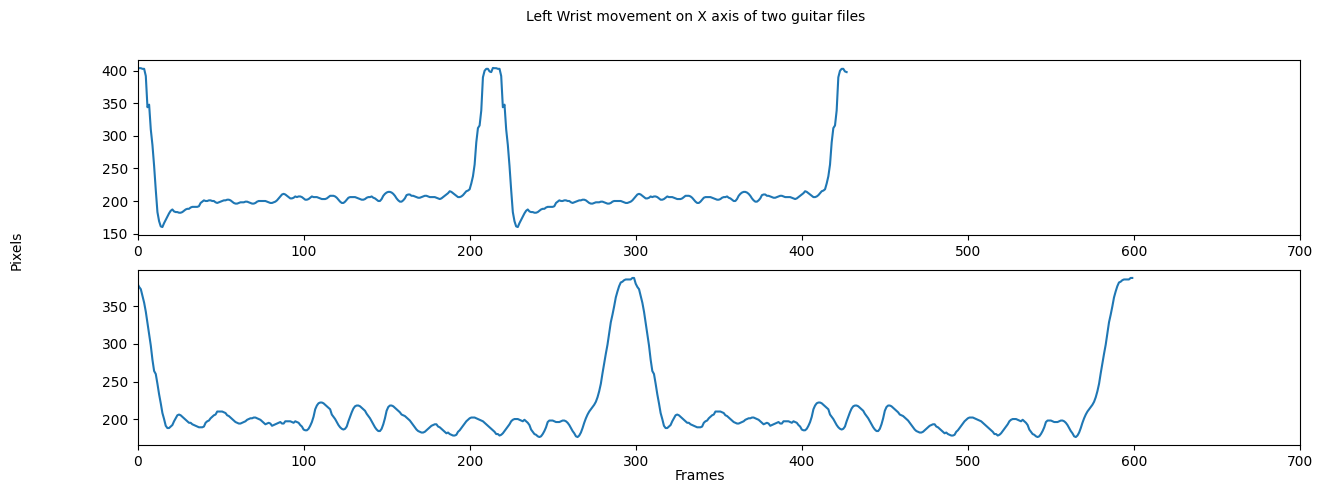

In [27]:
x_train_dtw = dtwfiles[0:5]
y_train_dtw = dtwlabels[0:5]
model_dtw = DynamicTimeWraping()
model_dtw.fit(x_train_dtw,y_train_dtw,classes)
fnum = 6`
_,lab = model_dtw.predict(dtwfiles[fnum])
print("\n The predicted class is --{}-- and the correct class is --{}--".format(lab,classes[dtwlabels[fnum]]))

Predicting...
 [ ====================================================================================================> ] 100 %
 The predicted class is --drums-- and the correct class is --violin--


### Model Evaluation 

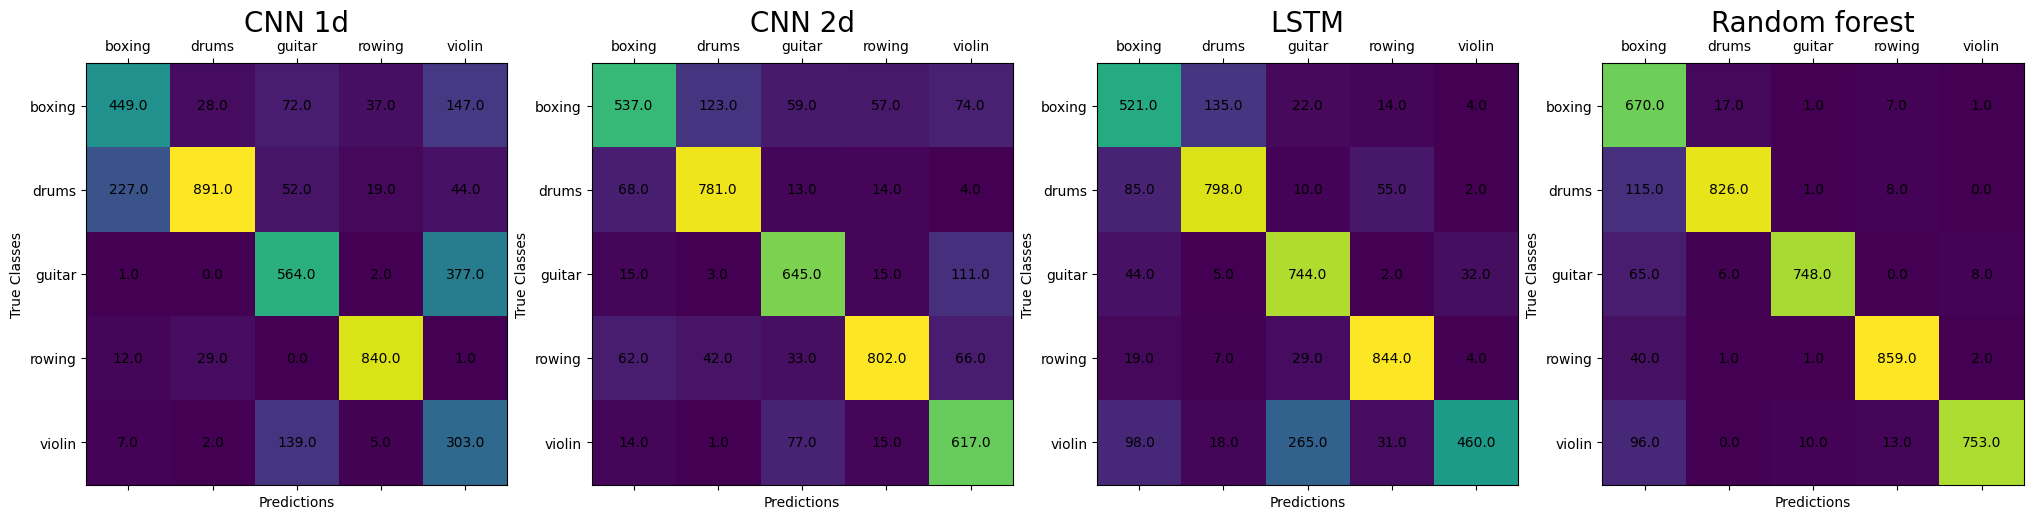

	     71.73%			      79.61%			      79.26%			      90.77%


In [28]:
compare_models.compare(cnn_1d_acc, cnn_2d_acc,rnn_acc,rf_acc,cnn_1d_cm, cnn_2d_cm,rnn_cm,rf_cm,classes)

In [12]:
print("Convolutional Neural Network 1 Dimension")
CNN_1D.summary(model_cnn1d,(54,30))
print('\n\n\n')
print("Convolutional Neural Network 2 Dimension")
CNN_2D.summary(model_cnn2d,(1,30,54))
print('\n\n\n')
print("Long Short Term Memory")
rnn.print_summary()

Convolutional Neural Network 1 Dimension
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 48, 31]           5,232
              ReLU-2               [-1, 48, 31]               0
         MaxPool1d-3               [-1, 48, 29]               0
            Conv1d-4               [-1, 32, 30]           3,104
              ReLU-5               [-1, 32, 30]               0
         MaxPool1d-6               [-1, 32, 28]               0
           Dropout-7               [-1, 32, 28]               0
            Conv1d-8                [-1, 1, 29]              65
              ReLU-9                [-1, 1, 29]               0
        MaxPool1d-10                [-1, 1, 27]               0
          Dropout-11                [-1, 1, 27]               0
           Linear-12                [-1, 1, 64]           1,792
             ReLU-13                [-1, 1, 64]               

In [13]:
eval_files = tdataload.test_dataload(30,header,test_folder,305)

Fetching Evaluation files
 [ ====================================================================================================> ] 100 %
 Evaluation files loaded


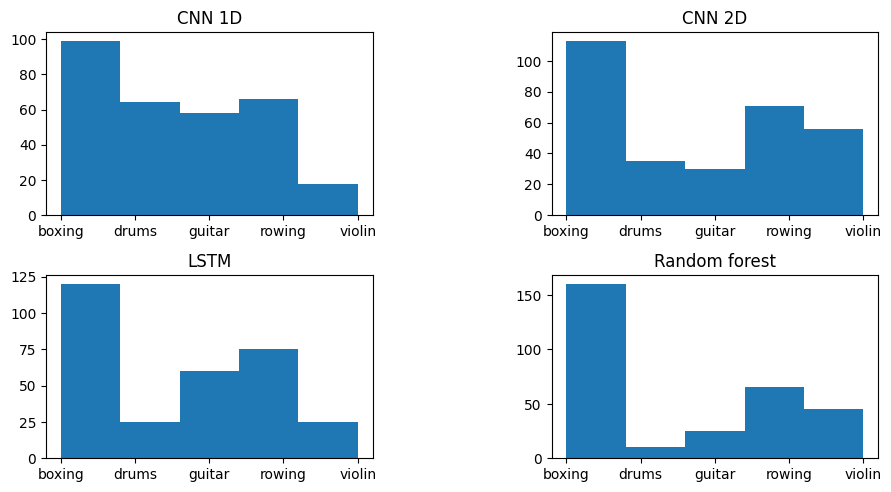

In [14]:
res_cnn_1d = CNN_1D.predict(model_cnn1d,eval_files,30,False)
res_cnn_2d = CNN_2D.predict(model_cnn2d,CNN_2D.predict_,eval_files,30,False)
res_rnn = rnn.predict(eval_files)
res_rf =rf.predict(eval_files,model_rf)
compare_models.dist(res_cnn_1d,res_cnn_2d,res_rnn,res_rf,classes)